In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [10]:
column_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
iris_df = pd.DataFrame(iris.data, columns = column_names)
iris_df['target'] = iris['target']
iris_df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(10)

x = iris_df.drop('target', axis = 1)
y = iris_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf_score = clf.score(x_test, y_test)

cross_values = cross_val_score(clf, x, y, cv = 5)
accuracy_score = np.mean(cross_values)

print(f'the accuracy of our model cross-evaluted is: {accuracy_score * 100:.2f}%')

the accuracy of our model cross-evaluted is: 95.33%


In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, x, y, cv = 5)

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [13]:
cross_values = cross_val_score(clf, x, y, cv = 5)
clf_cross_val = np.mean(cross_values)
clf_score, clf_cross_val

(0.9565217391304348, 0.9666666666666668)

In [14]:
print(f'the accuracy of our model with cross-evaluation is: {clf_cross_val * 100:.2f}%')

the accuracy of our model with cross-evaluation is: 96.67%


In [15]:
print(f'the accuracy of our model with the score method is: {clf_score * 100:.2f}%')

the accuracy of our model with the score method is: 95.65%


In [16]:
np.random.seed(10)

# binerizing the output
from sklearn.preprocessing import label_binarize
# y = label_binarize(y, classes=[0, 1, 2])
binary_y = label_binarize(y, classes = [0, 1, 2])

# predicting probabilities
y_probs = clf.predict_proba(x_test)
y_probs[:10]

array([[0.  , 0.95, 0.05],
       [0.  , 0.01, 0.99],
       [1.  , 0.  , 0.  ],
       [0.  , 0.99, 0.01],
       [1.  , 0.  , 0.  ],
       [0.  , 0.94, 0.06],
       [0.  , 0.48, 0.52],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.99, 0.01]])

In [17]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.95, 0.01, 0.  , 0.99, 0.  , 0.94, 0.48, 1.  , 0.  , 0.99])

## using the ROC curve
* note: works only for **binary** classification

learning new things about sklearn and ROC/AUC curves:

In [18]:
column_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
iris_df = pd.DataFrame(iris.data, columns = column_names)
iris_df['target'] = iris['target']
iris_df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# initializing our axes 
x = iris_df.drop('target', axis = 1)
y = iris_df['target']

# Binarizing the output (the target column)
y = label_binarize(y, classes=[0, 1, 2])
# the numbers of classes are the second dimension of the array
n_classes = y.shape[1]

# splitting into train and set the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.5)

# using as clf the OneVsRest, it fit one clf per class
# and fit the class against the others
# as estimator is uses the Support Vector Classificator
clf = OneVsRestClassifier(SVC()) 
# the tpr score of y is estimated by decision_function,
# which tells us how far we are and which side we are on 
# the plane generated by the classifier
y_score = clf.fit(x_train, y_train).decision_function(x_test)

# making them a dictionary with all the scores that we need
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    # the roc_curve function returns the fpr, the tpr and the thresholds
    # writing array[:, i] will return the tpr of that array
    fpr[i], tpr[i], threshold = roc_curve(y_test[:, i], y_score[:, i])
    # calculating the area under the ROC curve
    roc_auc[i] = auc(fpr[i], tpr[i])

In [58]:
roc_auc_score(y_test[:,0], y_score[:,0])

0.985632183908046

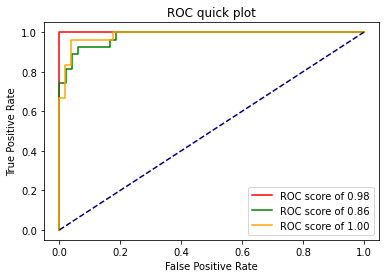

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_roc(fpr, tpr, n_classes):
    """
    takes two dictionary  one about the fpr and tpr plus the 
    number of classes for then doing a quick plot of all of them.
    can be a lot better, still a great starting point
    """
    # for now max three colors
    colors = ['red', 'green', 'orange']
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=colors[i],
        label='ROC score of %0.2f' % roc_auc_score(y_test[:,i], y_score[:,i]))
    #creating the guessing baseline
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC quick plot')
    # positioning the legend
    plt.legend(loc="lower right")
    plt.show()
    
plot_roc(fpr, tpr, n_classes)

trying it on another dataset

In [55]:
from sklearn.datasets import load_wine
wines = load_wine()

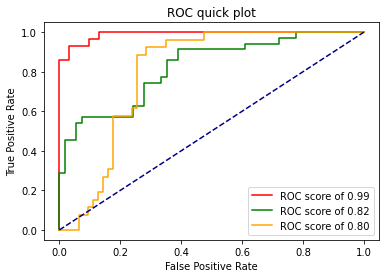

In [76]:
x = wines.data
y = wines.target

# Binarizing the output (the target column)
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# splitting into train and set the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.5)

clf = OneVsRestClassifier(SVC()) 
y_score = clf.fit(x_train, y_train).decision_function(x_test)

fpr_wines = dict()
tpr_wines = dict()
roc_auc_wines = dict()
for i in range(n_classes):
    fpr_wines[i], tpr_wines[i], threshold = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc_wines[i] = auc(fpr[i], tpr[i])
    
plot_roc(fpr_wines,tpr_wines, n_classes)